## Logistic Regression

Author: Thomas James Tiam-Lee

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generate Synthetic Data

In [69]:
np.random.seed(3)
reds = np.random.normal(loc=5, scale=1, size=15).reshape(-1,1)
blues = np.random.normal(loc=8, scale=1, size=15).reshape(-1,1)
X = np.concatenate((reds, blues))
X = np.concatenate((np.ones(30).reshape(-1, 1), X), axis=1)
y = np.concatenate((np.zeros(15), np.ones(15)))


Add the bias term.

### Plot the Data

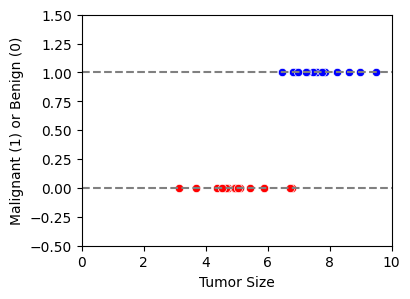

In [71]:
def plot_data():
  fig, ax = plt.subplots(1,1,figsize=(4, 3))
  sns.scatterplot(x=X[y==0][:,1].flatten(), y=y[y==0], color='red', marker='o', ax=ax);
  sns.scatterplot(x=X[y==1][:,1].flatten(), y=y[y==1], color='blue', marker='o', ax=ax);
  ax.axhline(0, linestyle='--', color='gray');
  ax.axhline(1, linestyle='--', color='gray');
  ax.set_xlim((0,10));
  ax.set_ylim((-0.5, 1.5));
  ax.set_xlabel('Tumor Size');
  ax.set_ylabel('Malignant (1) or Benign (0)')
plot_data()

### Linear Model without Activation Function

In [72]:
from ipywidgets import Layout, interact, FloatSlider

def plot_data_with_linear_model(w1, w0):
  fig, ax = plt.subplots(1,1,figsize=(4, 3))
  sns.scatterplot(x=X[y==0][:,1].flatten(), y=y[y==0], color='red', marker='o', ax=ax);
  sns.scatterplot(x=X[y==1][:,1].flatten(), y=y[y==1], color='blue', marker='o', ax=ax);
  ax.axhline(0, linestyle='--', color='gray');
  ax.axhline(1, linestyle='--', color='gray');
  ax.set_xlim((0,10));
  ax.set_ylim((-0.5, 1.5));
  ax.set_xlabel('Tumor Size');
  ax.set_ylabel('Malignant (1) or Benign (0)')

  xlist = np.linspace(0, 10, 50)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='red');

interact(plot_data_with_linear_model,
        w0=FloatSlider(min=-10, max=10, value=0, step=0.1, layout=Layout(width='600px')),
        w1=FloatSlider(min=-2, max=2, value=0, step=0.01, layout=Layout(width='600px')));
  

interactive(children=(FloatSlider(value=0.0, description='w1', layout=Layout(width='600px'), max=2.0, min=-2.0…

### Linear Model with Activation Function

We use the **sigmoid activation function** in logistic regression.

$\sigma(x)=\frac{1}{1 + e^{-x}}$

In [73]:
def plot_data_with_linear_and_logistic_model(w1, w0):
  fig, ax = plt.subplots(1,1,figsize=(4, 3))
  sns.scatterplot(x=X[y==0][:,1].flatten(), y=y[y==0], color='red', marker='o', ax=ax);
  sns.scatterplot(x=X[y==1][:,1].flatten(), y=y[y==1], color='blue', marker='o', ax=ax);
  ax.axhline(0, linestyle='--', color='gray');
  ax.axhline(1, linestyle='--', color='gray');
  ax.set_xlim((0,10));
  ax.set_ylim((-0.5, 1.5));
  ax.set_xlabel('Tumor Size');
  ax.set_ylabel('Malignant (1) or Benign (0)')

  xlist = np.linspace(0, 10, 50)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='red', alpha=0.25);

  ylist = 1 / (1 + np.exp(-ylist))
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='green');
  ax.axhline(0.5, linestyle=':', color='gray');

interact(plot_data_with_linear_and_logistic_model,
        w0=FloatSlider(min=-30, max=30, value=0, step=0.1, layout=Layout(width='600px')),
        w1=FloatSlider(min=-4, max=4, value=0, step=0.01, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=0.0, description='w1', layout=Layout(width='600px'), max=4.0, min=-4.0…

### Cost Function

The cost function in logistic regression is the [cross entropy loss](https://medium.com/@sami.benbrahim/the-intuition-behind-logistic-regression-loss-function-64390260ed81).

In [55]:
def cross_entropy(y, y_pred):
  return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).sum()

In [74]:
def plot_data_with_linear_and_logistic_model_with_cost(w1, w0):
  fig, ax = plt.subplots(1,1,figsize=(4, 3))
  sns.scatterplot(x=X[y==0][:,1].flatten(), y=y[y==0], color='red', marker='o', ax=ax);
  sns.scatterplot(x=X[y==1][:,1].flatten(), y=y[y==1], color='blue', marker='o', ax=ax);
  ax.axhline(0, linestyle='--', color='gray');
  ax.axhline(1, linestyle='--', color='gray');
  ax.set_xlim((0,10));
  ax.set_ylim((-0.5, 1.5));
  ax.set_xlabel('Tumor Size');
  ax.set_ylabel('Malignant (1) or Benign (0)')

  xlist = np.linspace(0, 10, 50)
  ylist = w1 * xlist + w0
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='red', alpha=0.25);

  ylist = 1 / (1 + np.exp(-ylist))
  sns.lineplot(x=xlist, y=ylist, ax=ax, color='green');
  ax.axhline(0.5, linestyle=':', color='gray');

  w = np.array([w0, w1])
  y_pred = 1 / (1 + np.exp(-(X @ w)));
  cost = cross_entropy(y, y_pred); 
  ax.set_title(f'Cost: {cost}');

interact(plot_data_with_linear_and_logistic_model_with_cost,
        w0=FloatSlider(min=-30, max=30, value=0, step=0.1, layout=Layout(width='600px')),
        w1=FloatSlider(min=-4, max=4, value=0, step=0.01, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=0.0, description='w1', layout=Layout(width='600px'), max=4.0, min=-4.0…

### Gradient Descent

We can use gradient descent to minimize the cost. Note: it just so happened that the derivative of the cross entropy loss is the same as the derivative of the MSE loss.

Start with random parameters.

In [96]:
w = np.array([0, 0])

This loop performs gradient descent.

Iteration 1: w = [0 0]
  Cost: 20.794415416798348
Iteration 2: w = [0.         0.09909785]
  Cost: 20.387575658406966
Iteration 3: w = [-0.02280515  0.04426301]
  Cost: 20.187075168782254
Iteration 4: w = [-0.03246584  0.07762786]
  Cost: 20.10511844081969
Iteration 5: w = [-0.04944287  0.06148953]
  Cost: 20.048609823929866
Iteration 6: w = [-0.06213529  0.07398712]
  Cost: 20.00264184065763
Iteration 7: w = [-0.07723198  0.07008876]
  Cost: 19.959857917260646
Iteration 8: w = [-0.09089513  0.07563553]
  Cost: 19.918320103291453
Iteration 9: w = [-0.10533399  0.07575643]
  Cost: 19.877294397274323
Iteration 10: w = [-0.11928023  0.07898916]
  Cost: 19.836554797742394
Iteration 11: w = [-0.13346242  0.08043093]
  Cost: 19.79602282394267
Iteration 12: w = [-0.14746282  0.0828932 ]
  Cost: 19.75567265989749
Iteration 13: w = [-0.16152098  0.08476464]
  Cost: 19.715495231592147
Iteration 14: w = [-0.17549984  0.08696778]
  Cost: 19.67548708258511
Iteration 15: w = [-0.18947791  0.08897486

C:\Users\thoma\AppData\Local\Temp\ipykernel_15336\1723989187.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize=(4, 3))


Iteration 2202: w = [-10.34342517   1.6263511 ]
  Cost: 6.467165788933104
Iteration 2203: w = [-10.34545961   1.62665826]
  Cost: 6.466319286549965
Iteration 2204: w = [-10.34749329   1.6269653 ]
  Cost: 6.465473427390022
Iteration 2205: w = [-10.34952619   1.62727222]
  Cost: 6.464628210696377
Iteration 2206: w = [-10.35155832   1.62757902]
  Cost: 6.463783635713322
Iteration 2207: w = [-10.35358968   1.6278857 ]
  Cost: 6.462939701686365
Iteration 2208: w = [-10.35562026   1.62819227]
  Cost: 6.462096407862199
Iteration 2209: w = [-10.35765008   1.62849871]
  Cost: 6.4612537534887196
Iteration 2210: w = [-10.35967913   1.62880504]
  Cost: 6.460411737815011
Iteration 2211: w = [-10.36170741   1.62911126]
  Cost: 6.459570360091353
Iteration 2212: w = [-10.36373492   1.62941735]
  Cost: 6.458729619569216
Iteration 2213: w = [-10.36576167   1.62972333]
  Cost: 6.4578895155012495
Iteration 2214: w = [-10.36778764   1.63002919]
  Cost: 6.4570500471412915
Iteration 2215: w = [-10.36981285  

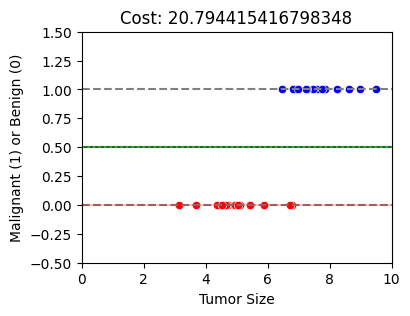

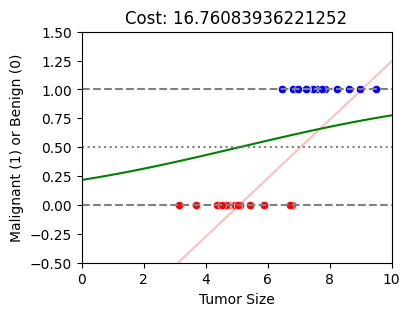

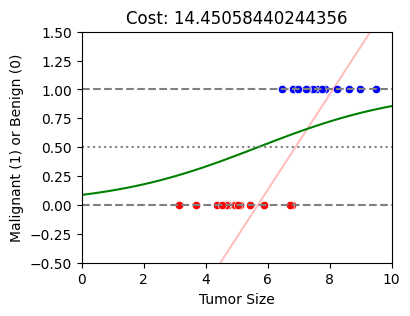

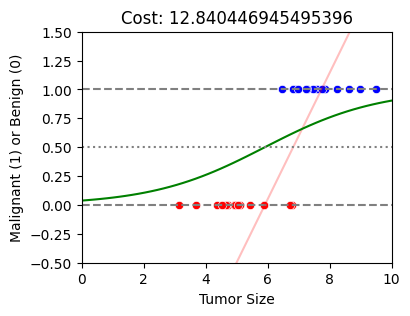

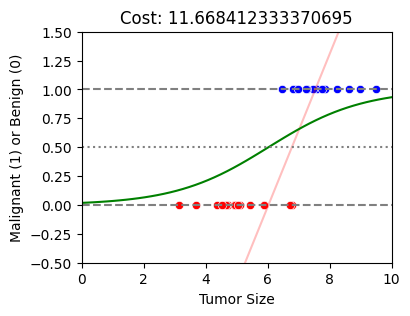

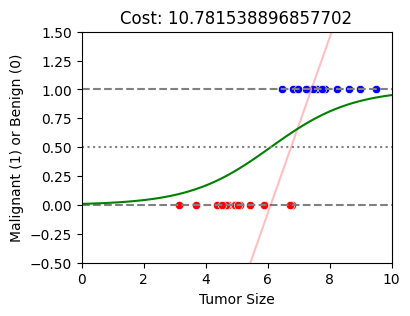

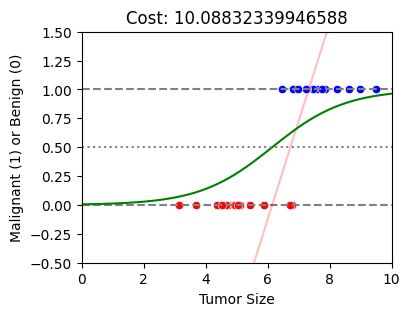

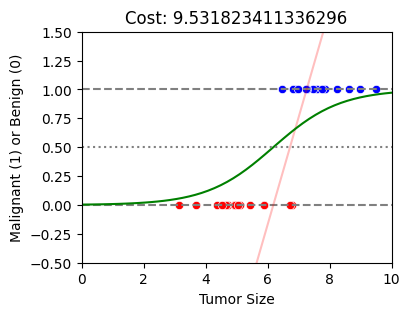

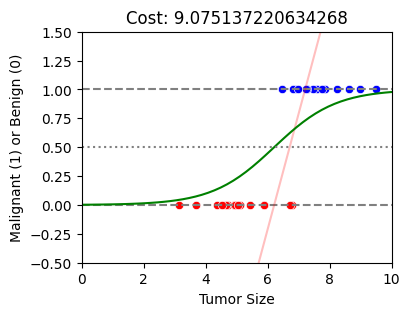

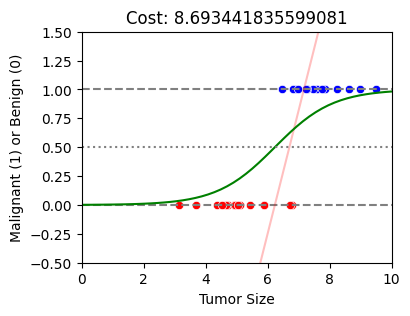

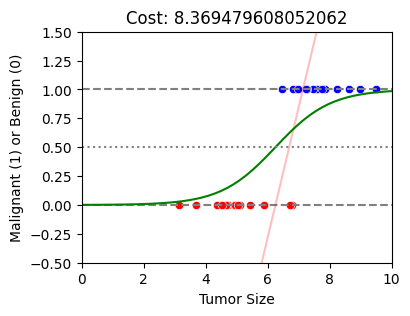

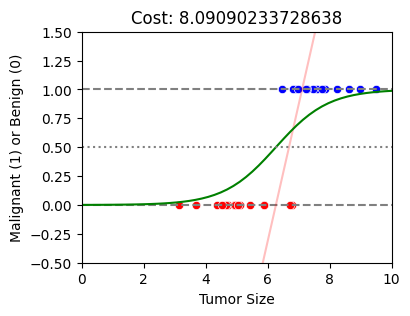

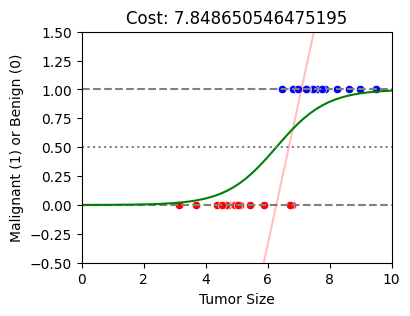

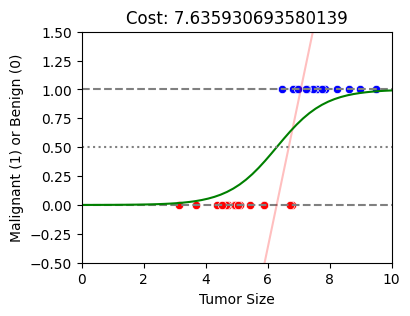

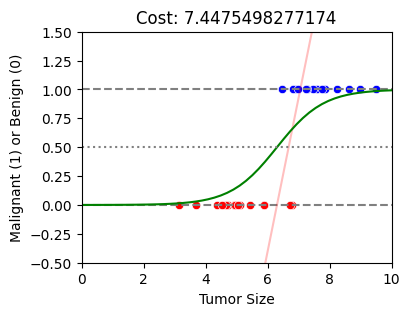

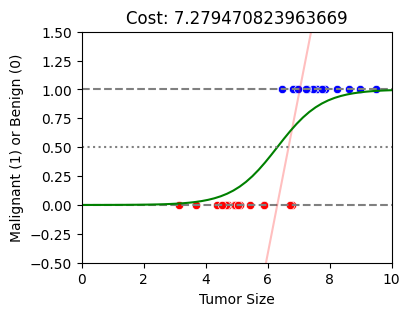

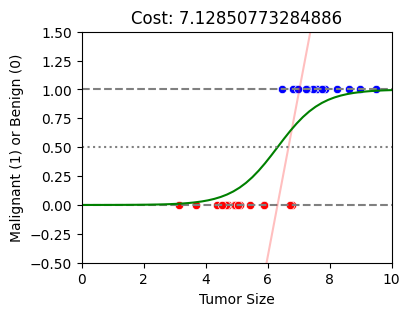

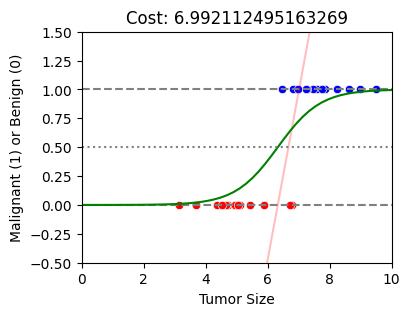

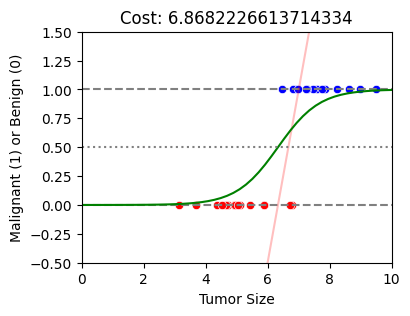

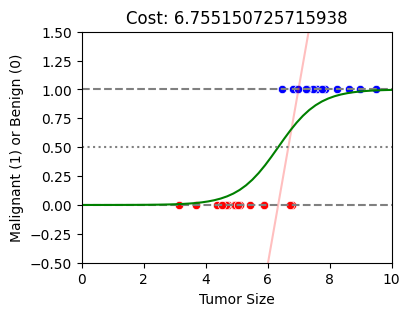

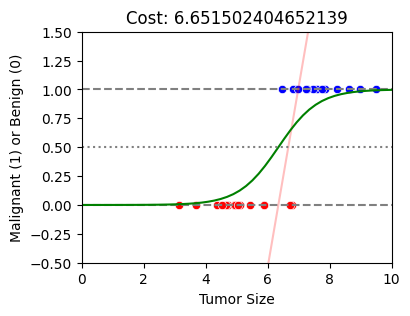

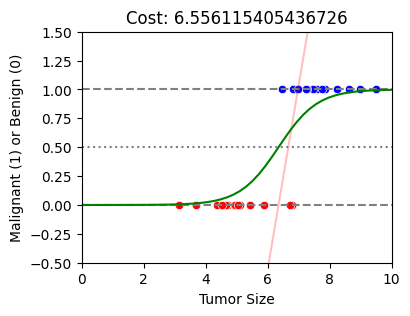

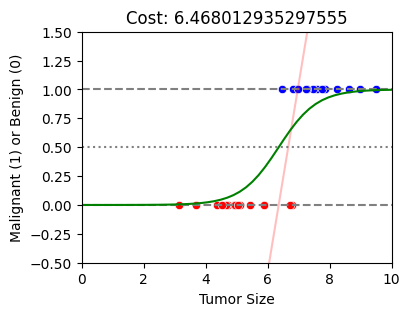

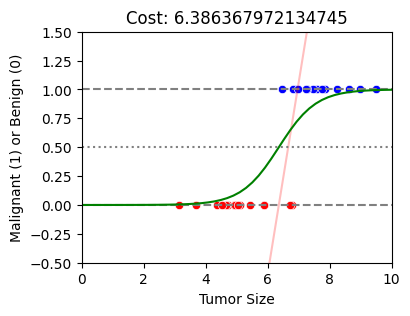

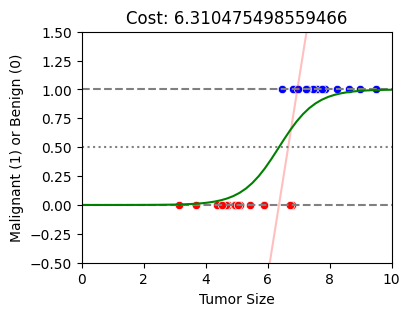

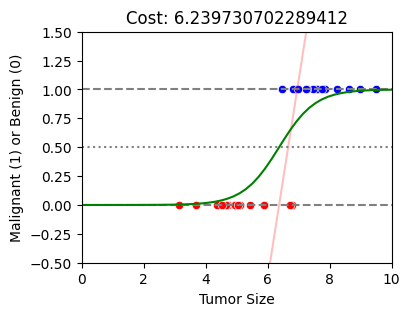

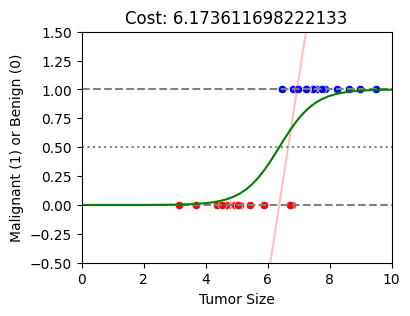

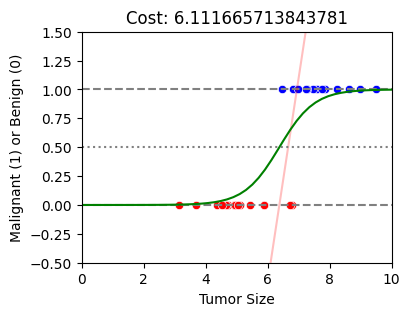

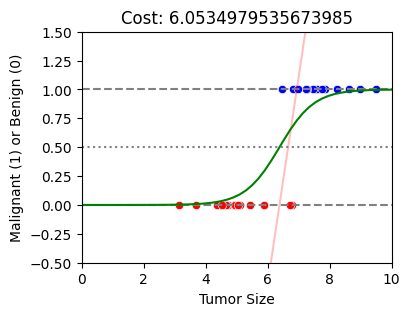

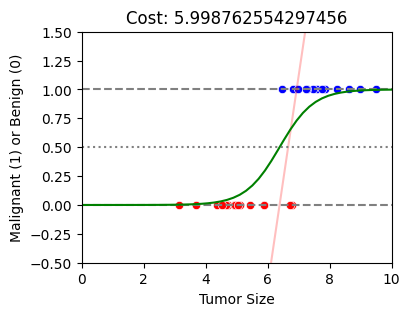

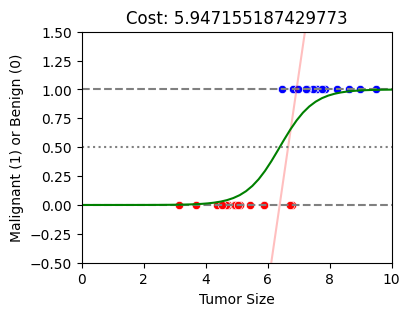

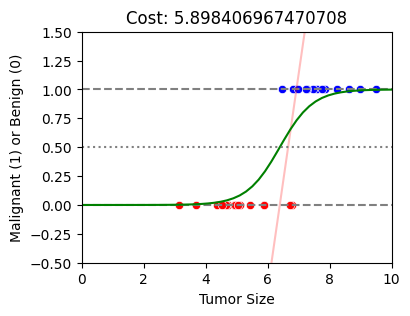

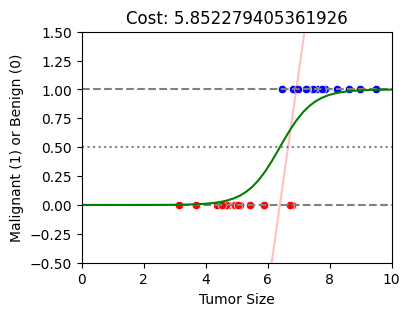

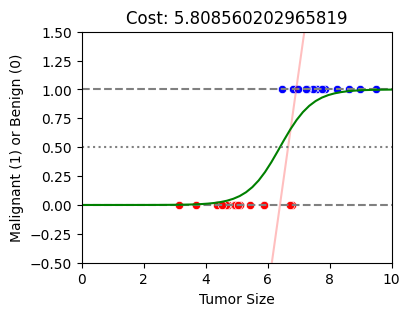

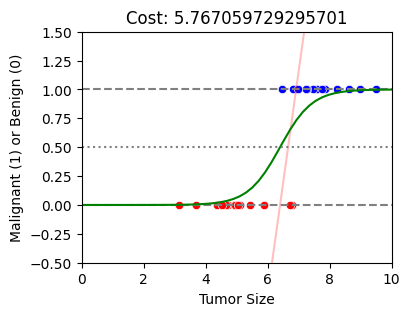

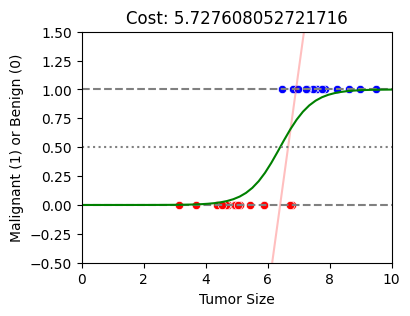

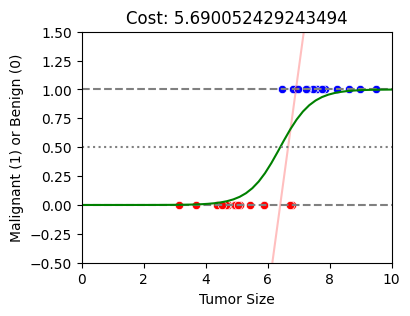

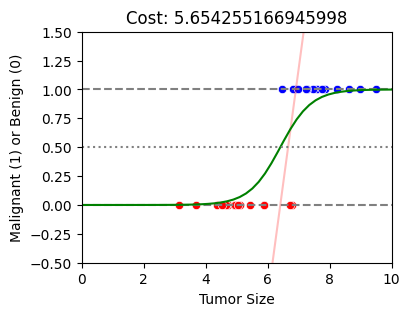

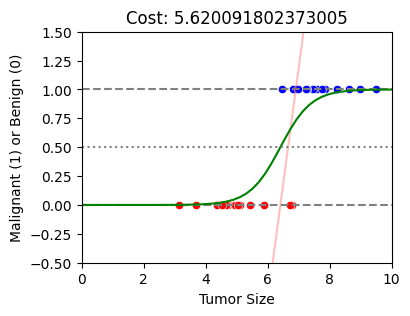

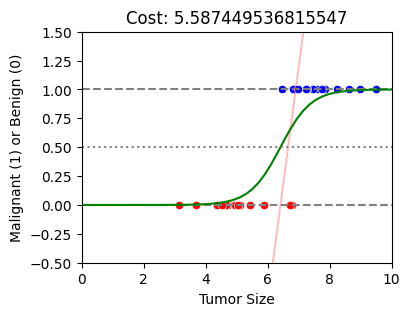

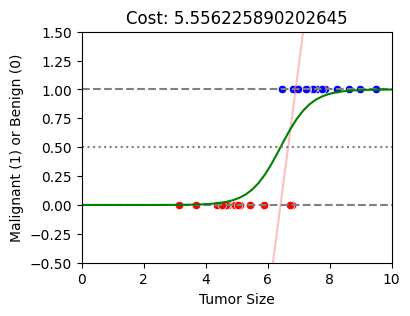

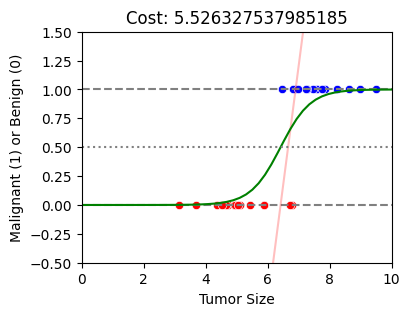

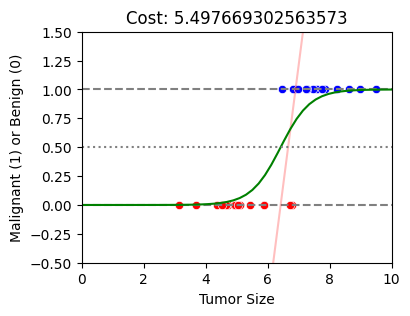

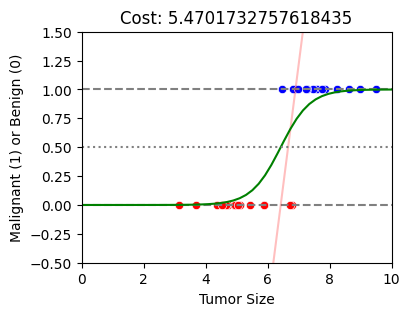

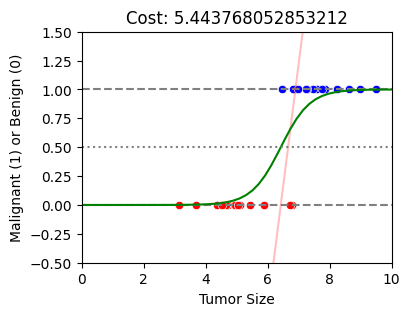

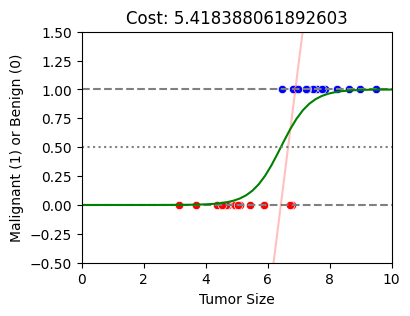

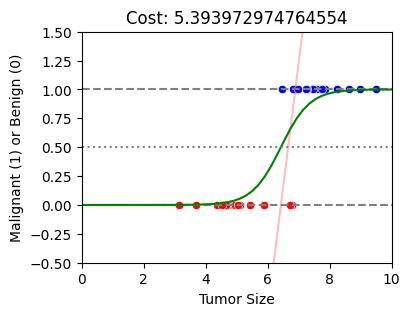

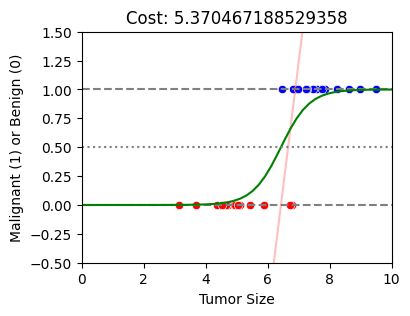

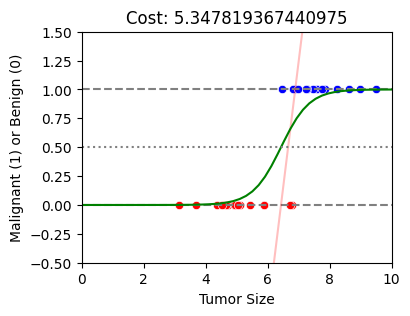

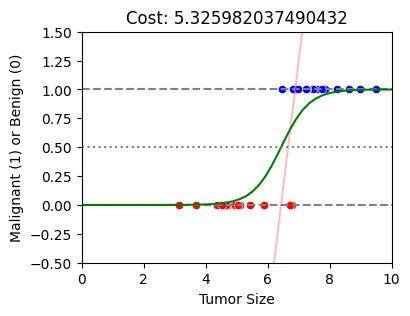

In [97]:
lr = 0.005
num_iter = 5000
for i in range(num_iter):
  print(f'Iteration {i + 1}: w = {w}')
  y_pred = 1 / (1 + np.exp(-(X @ w)));
  cost = cross_entropy(y, y_pred); 
  print(f'  Cost: {cost}')
  if i % 100 == 0:
    plot_data_with_linear_and_logistic_model_with_cost(w[1], w[0])
  gradient = (y_pred - y) @ X
  w = w - lr * gradient